<a href="https://colab.research.google.com/github/Awoyawson/Artificial-Neutral-Network/blob/main/MNISTData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import needed Libariries 
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# this will show the version of TensorFlow we are using
print(tf.__version__)

2.4.1


In [3]:
# Load  the MINST dataset
mnist = datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


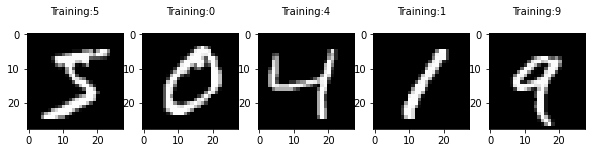

In [4]:
# Virsualise a few examples
plt.figure (figsize=(10,2))
for index,(image,label) in enumerate(zip(x_train[0:5],y_train[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image,(28,28)),cmap=plt.cm.gray)
  plt.title('Training:{}\n'.format(label),fontsize = 10)

In [5]:
# convert data  from integers to floating -point number(between 0 and 9)
x_train,x_test = x_train/255.0,x_test/255.0


In [7]:
# Build the tf.keras.sequential model by adding a layer after another


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [8]:
#Compile the model : add optimizer, loss, and performance evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #used when the true labels are integers - 'categorical_crossentropy' is used when the true labels are one-hot encoded 
              metrics=['accuracy'])

In [9]:
# Training model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4766 - accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1493 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9779


In [10]:
#Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print("loss = {}, accuracy = {}".format(loss, accuracy))


313/313 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9776
loss = 0.07262171804904938, accuracy = 0.9775999784469604


In [11]:
import seaborn as sns
from sklearn import metrics
predictions = model.predict(x_test)  #gives the probabilities of belonging of this image to the classes
print(predictions)

#To get the classes:
classes = np.argmax(predictions, axis = 1)  #finds the index of the highest value in each row, axis=1 means that the operation is across rows
print(classes)

[[6.2147514e-08 4.1335199e-11 1.7101989e-07 ... 9.9993396e-01
  8.4696765e-08 6.0185430e-06]
 [1.1916125e-07 1.7529022e-05 9.9997699e-01 ... 1.3291603e-12
  1.8928727e-06 1.7300505e-12]
 [1.2991578e-07 9.9937075e-01 1.9736559e-04 ... 3.9874917e-04
  1.5114826e-05 2.8868135e-07]
 ...
 [1.6392410e-13 2.5204245e-11 5.3251626e-12 ... 7.4699869e-07
  2.3748751e-07 2.7608382e-06]
 [5.6916299e-08 6.3703820e-09 3.8199621e-12 ... 1.1733962e-09
  7.3893782e-05 1.5954016e-11]
 [8.5343821e-09 2.9180510e-13 5.3677248e-08 ... 3.6574480e-12
  1.7278102e-09 1.1248699e-12]]
[7 2 1 ... 4 5 6]


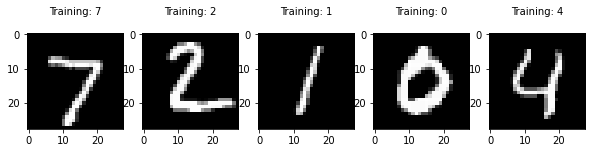

In [12]:
#Visualise
plt.figure(figsize=(10, 2))
for index, (image, label) in enumerate(zip(x_test[0:5], classes[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 10)

Text(0.5, 1.0, 'Accuracy = 0.9775999784469604')

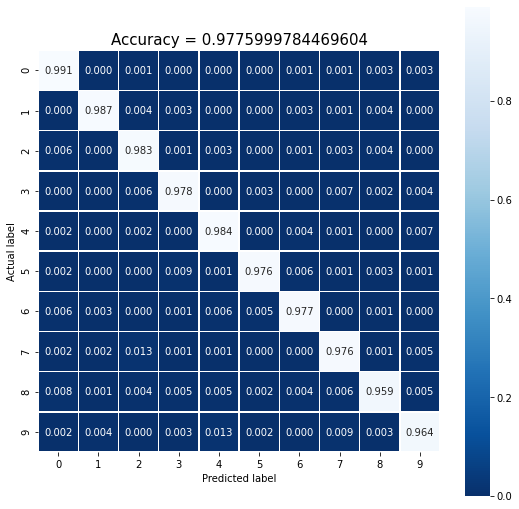

In [13]:

cm = metrics.confusion_matrix(y_test, classes, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy = {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

In [14]:
#Callbacks : A callback performs actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch)
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import os, datetime

early_stopping = EarlyStopping(monitor='val_loss', patience=5)  #which quantity to monitor to decide early stopping
#patience = the number of epochs to wait before stopping

#Notice that since we set patience=5, we won’t get the best model, but the model two epochs after the best model.
#==> An additional callback is required that saves the best model observed during training. This is the ModelCheckpoint callback

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks = [early_stopping, ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
             TensorBoard(logdir, histogram_freq=1)]

history = model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[callbacks]
)


#The saved model can then be loaded and evaluated any time by calling the load_model() function.
from keras.models import load_model
saved_model = load_model('best_model.h5')
test_acc = saved_model.evaluate(x_test, y_test)

Epoch 1/50
1125/1125 - 4s - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 2/50
1125/1125 - 3s - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0475 - val_accuracy: 0.9845
Epoch 3/50
1125/1125 - 3s - loss: 0.0460 - accuracy: 0.9850 - val_loss: 0.0570 - val_accuracy: 0.9819
Epoch 4/50
1125/1125 - 3s - loss: 0.0438 - accuracy: 0.9854 - val_loss: 0.0508 - val_accuracy: 0.9835
Epoch 5/50
1125/1125 - 3s - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.0559 - val_accuracy: 0.9817
Epoch 6/50
1125/1125 - 3s - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0560 - val_accuracy: 0.9829
313/313 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9796


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs
